**JDV connection and run query, load data into DataFrame**
<hr/>

In [2]:
from dotenv import load_dotenv
import os
import psycopg2
import psycopg2.extensions
import pandas as pd

/home/ptoraska/1-PTDocs/Python-Learning/venv36/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
# Create method to connect jdv connection with VDM
def jdv_conn(url, port, dbname, username, password):
    """
    Makes an instance of a VDM connection.
    :param url: host
    :type url: str
    :param port: port
    :type port: str
    :param dbname: database name
    :type dbname: str
    :param username: username
    :type username: str
    :param password: password
    :type password: str
    """

    config = {
        "host": url,
        "port": port,
        "user": username,
        "password": password,
        "database": dbname,
        "sslmode": "verify-ca",
        "sslrootcert": "root.crt"
    }

    connection = psycopg2.connect(**config)
    
    return connection

In [4]:
sql_query = "SELECT * FROM APL_VDM.sfdc_mrktng_lead LIMIT 0, 1000"

In [5]:
load_dotenv()
vdm_connect_instance = jdv_conn(
    url=os.getenv("MARKETING_VDM_URL"),
    port=os.getenv("MARKETING_VDM_PORT"),
    dbname=os.getenv("MARKETING_VDM_DBNAME"),
    username=os.getenv("MARKETING_VDM_USER"),
    password=os.getenv("MARKETING_VDM_PASSWORD"),
)

In [6]:
vdm_query_cur = vdm_connect_instance.cursor()
try:
    vdm_query_cur.execute(sql_query)

    # Adding Header row of the query to result set
    col_headers = [h_row[0] for h_row in vdm_query_cur.description]
    get_result = vdm_query_cur.fetchall()
    # get_result.insert(0, col_headers)
finally:
    vdm_query_cur.close()
    vdm_connect_instance.close()

In [ ]:
col_headers

In [7]:
df = pd.DataFrame(get_result, columns = col_headers)

In [8]:
df.transpose().describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,33,32,32,33,33,33,44,46,48,47,...,47,44,45,44,44,50,50,45,43,44
unique,32,30,30,32,32,32,37,40,39,41,...,35,32,38,34,35,37,38,33,33,34
top,False,False,False,False,False,False,False,US,False,US,...,False,False,False,False,False,False,False,False,False,False
freq,2,2,2,2,2,2,3,3,4,3,...,5,5,3,3,3,5,4,4,3,4


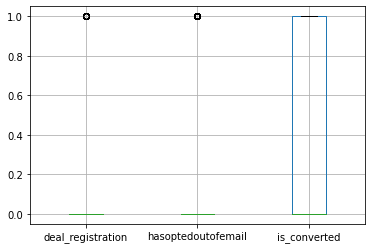

In [9]:
df.boxplot() # shift+Tab

In [10]:
df.dropna(axis=1, how='all')

,lead_id,converted_opportunity_id,converted_account_id,deal_id,company,deal_approved_date,deal_registration,deal_registration_status,lead_source,lead_status,...,owner_name,created_by_name,last_modified_by_name,qualified_by,business_unit,stage,lead_scoring,queue_name,qualified_by_name,rating
0,00Q30000007WGRCEA4,0,0013000000AVzC8AAL,None,Sigma-Aldrich Corporation,NaT,False,None,Seminar - Internal,Converted,...,John Castillo,Integration Admin,Chris Mendler,None,None,None,None,None,None,None
1,00Q30000007WIAqEAO,0,0,None,INTERGRAPH PUBLIC SAFETY,NaT,False,None,Trade Show,Converted,...,Rob Lawson,Integration Admin,Chris Mendler,None,None,None,None,None,None,None
2,00Q30000007WIgbEAG,0,0,None,SmartLink Radio Networks,NaT,False,None,Seminar - Internal,Converted,...,Reggie Ellis,Integration Admin,Chris Mendler,None,None,None,None,None,None,None
3,00Q30000007WJ9tEAG,00630000003b76bAAA,00130000009nMV7AAM,None,valcom,NaT,False,None,Seminar - Internal,Converted,...,John Castillo,Integration Admin,Chris Mendler,None,None,None,None,None,None,None
4,00Q30000007WKBwEAO,0,001300000094U56AAE,None,University of Pennsylvania,NaT,False,None,Seminar - Internal,Converted,...,Shawn Briscoe,Integration Admin,Chris Mendler,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,00Q3a00000ml6oZEAQ,0,0,D-7478610,Neuberger Berman,NaT,False,Draft,UNAVAILABLE,Nurturing,...,Inquiries,Eloqua Marketing,Eloqua Marketing,None,None,Inquiry,Send to Lead Development: True\nQualification ...,Inquiries,None,C3
996,00Q3a00000ml6tcEAA,0,0,D-7478918,VMware,NaT,False,Draft,UNAVAILABLE,Nurturing,...,Inquiries,Eloqua Marketing,Eloqua Marketing,None,None,Inquiry,Send to Lead Development: True\nQualification ...,Inquiries,None,C3
997,00Q3a00000ml73eEAA,0,0,D-7479179,ngc,NaT,False,Draft,UNAVAILABLE,Nurturing,...,Inquiries,Eloqua Marketing,Eloqua Marketing,None,None,Inquiry,Qualification Level: D\nQualification Source: ...,Inquiries,None,D4
998,00Q3a00000ml7SqEAI,0,0,D-7479882,BREB,NaT,False,None,UNAVAILABLE,Waiting,...,India - APAC,Eloqua Marketing,Eloqua Marketing,None,None,Prospect,Qualification Level: D\nQualification Source: ...,India - APAC,None,D3


**Hierarchical Indexing**

In [13]:
df.set_index(["lead_id"], drop=False)

,lead_id,converted_opportunity_id,converted_account_id,deal_id,company,deal_approved_date,deal_registration,deal_registration_status,lead_source,lead_status,...,last_modified_by_name,mkt_cl_wf_converted_status,state_province,qualified_by,business_unit,stage,lead_scoring,queue_name,qualified_by_name,rating
lead_id,,,,,,,,,,,,,,,,,,,,,
00Q30000007WGRCEA4,00Q30000007WGRCEA4,0,0013000000AVzC8AAL,None,Sigma-Aldrich Corporation,NaT,False,None,Seminar - Internal,Converted,...,Chris Mendler,None,None,None,None,None,None,None,None,None
00Q30000007WIAqEAO,00Q30000007WIAqEAO,0,0,None,INTERGRAPH PUBLIC SAFETY,NaT,False,None,Trade Show,Converted,...,Chris Mendler,None,None,None,None,None,None,None,None,None
00Q30000007WIgbEAG,00Q30000007WIgbEAG,0,0,None,SmartLink Radio Networks,NaT,False,None,Seminar - Internal,Converted,...,Chris Mendler,None,None,None,None,None,None,None,None,None
00Q30000007WJ9tEAG,00Q30000007WJ9tEAG,00630000003b76bAAA,00130000009nMV7AAM,None,valcom,NaT,False,None,Seminar - Internal,Converted,...,Chris Mendler,None,None,None,None,None,None,None,None,None
00Q30000007WKBwEAO,00Q30000007WKBwEAO,0,001300000094U56AAE,None,University of Pennsylvania,NaT,False,None,Seminar - Internal,Converted,...,Chris Mendler,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00Q3a00000ml6oZEAQ,00Q3a00000ml6oZEAQ,0,0,D-7478610,Neuberger Berman,NaT,False,Draft,UNAVAILABLE,Nurturing,...,Eloqua Marketing,None,None,None,None,Inquiry,Send to Lead Development: True\nQualification ...,Inquiries,None,C3
00Q3a00000ml6tcEAA,00Q3a00000ml6tcEAA,0,0,D-7478918,VMware,NaT,False,Draft,UNAVAILABLE,Nurturing,...,Eloqua Marketing,None,None,None,None,Inquiry,Send to Lead Development: True\nQualification ...,Inquiries,None,C3
00Q3a00000ml73eEAA,00Q3a00000ml73eEAA,0,0,D-7479179,ngc,NaT,False,Draft,UNAVAILABLE,Nurturing,...,Eloqua Marketing,None,None,None,None,Inquiry,Qualification Level: D\nQualification Source: ...,Inquiries,None,D4


In [14]:
df.stack()

0    lead_id                                                    00Q30000007WGRCEA4
     converted_opportunity_id                                                    0
     converted_account_id                                       0013000000AVzC8AAL
     company                                             Sigma-Aldrich Corporation
     deal_registration                                                       False
                                                       ...                        
999  created_by_name                                              Eloqua Marketing
     last_modified_by_name                                        Eloqua Marketing
     stage                                                                Prospect
     lead_scoring                Qualification Level: B\nQualification Source: ...
     rating                                                                     B2
Length: 42422, dtype: object

In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [19]:
list(df.groupby("company"))

[('-',
                  lead_id converted_opportunity_id converted_account_id  \
  227  00Q3a00000m8wq0EAA                        0                    0   
  359  00Q3a00000m8jSSEAY                        0                    0   
  738  00Q3a00000m94mmEAA                        0                    0   
  
         deal_id company deal_approved_date  deal_registration  \
  227  D-7439073       -                NaT              False   
  359  D-7413972       -                NaT              False   
  738  D-7451541       -                NaT              False   
  
      deal_registration_status  lead_source lead_status  ...  \
  227                     None  UNAVAILABLE     Waiting  ...   
  359                    Draft  UNAVAILABLE     Waiting  ...   
  738                     None  UNAVAILABLE   Nurturing  ...   
  
      last_modified_by_name mkt_cl_wf_converted_status state_province  \
  227      Eloqua Marketing                       None           None   
  359     Integrat

In [23]:
list(df.groupby("lead_id")

[('00Q30000007WGLWEA4',
                  lead_id converted_opportunity_id converted_account_id deal_id  \
  487  00Q30000007WGLWEA4                        0                    0    None   
  
                         company deal_approved_date  deal_registration  \
  487  University of Connecticut                NaT              False   
  
      deal_registration_status lead_source lead_status  ...  \
  487                     None    GLS Lead   Nurturing  ...   
  
      last_modified_by_name mkt_cl_wf_converted_status state_province  \
  487          Raysal Dizon                       None           None   
  
             qualified_by business_unit    stage lead_scoring queue_name  \
  487  00560000001StpBAAS          None  Inquiry         None  Inquiries   
  
      qualified_by_name rating  
  487        Amy McHugh     C4  
  
  [1 rows x 68 columns]),
 ('00Q30000007WGRCEA4',
                lead_id converted_opportunity_id converted_account_id deal_id  \
  0  00Q30000007WGRCEA4

In [29]:
from pprint import pprint

In [30]:
pprint(dict(list(df["lead_id"].groupby(df["lead_scoring"]))))

{"Contact Sales: True\nQualification Level: C\nQualification Source: Eloqua Lead Score 'Profile' = 52\nInterest Level: 3\nInterest Source: Eloqua Lead Score 'Engagement' = 19\nLead Ranking Source: Contact Sales\nLast Scored Timestamp: 2019-08-28 03:06:05": 721    00Q3a00000m944oEAA
Name: lead_id, dtype: object,
 "Contact Sales: True\nQualification Level: C\nQualification Source: Eloqua Lead Score 'Profile' = 78\nInterest Level: 3\nInterest Source: Eloqua Lead Score 'Engagement' = 10\nLead Ranking Source: Contact Sales\nLast Scored Timestamp: 2019-09-04 18:06:18": 476    00Q3a00000ml95XEAQ
Name: lead_id, dtype: object,
 "Contact Sales: True\nQualification Level: D\nQualification Source: Eloqua Lead Score 'Profile' = 0\nInterest Level: 3\nInterest Source: Eloqua Lead Score 'Engagement' = 19\nLead Ranking Source: Contact Sales\nLast Scored Timestamp: 2019-08-21 11:06:15": 370    00Q3a00000m8k5kEAA
Name: lead_id, dtype: object,
 "Contact Sales: True\nQualification Level: D\nQualification S

Name: lead_id, dtype: object,
 "Qualification Level: D\nQualification Source: Eloqua Lead Score 'Profile' = 0\nInterest Level: 4\nInterest Source: Eloqua Lead Score 'Engagement' = 0\nLead Ranking Source: Lead Rating = D4\nLast Scored Timestamp: 2019-08-26 21:06:40": 601    00Q3a00000m8xNmEAI
Name: lead_id, dtype: object,
 "Qualification Level: D\nQualification Source: Eloqua Lead Score 'Profile' = 0\nInterest Level: 4\nInterest Source: Eloqua Lead Score 'Engagement' = 0\nLead Ranking Source: Lead Rating = D4\nLast Scored Timestamp: 2019-08-26 23:06:34": 766    00Q3a00000kcZsSEAU
Name: lead_id, dtype: object,
 "Qualification Level: D\nQualification Source: Eloqua Lead Score 'Profile' = 0\nInterest Level: 4\nInterest Source: Eloqua Lead Score 'Engagement' = 0\nLead Ranking Source: Lead Rating = D4\nLast Scored Timestamp: 2019-09-03 22:06:28": 979    00Q3a00000ml6MgEAI
Name: lead_id, dtype: object,
 "Qualification Level: D\nQualification Source: Eloqua Lead Score 'Profile' = 0\nInterest L

In [36]:
df["rating"].groupby(df["lead_id"]).describe()

,count,unique,top,freq
lead_id,,,,
00Q30000007WGLWEA4,1,1,C4,1
00Q30000007WGRCEA4,0,0,NaN,NaN
00Q30000007WGcWEAW,0,0,NaN,NaN
00Q30000007WIAqEAO,0,0,NaN,NaN
00Q30000007WIIEEA4,0,0,NaN,NaN
...,...,...,...,...
00Q3a00000mlqwREAQ,1,1,D3,1
00Q3a00000mlr9kEAA,1,1,C4,1
00Q3a00000mlrd2EAA,1,1,C3,1
